In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving AMZN.csv to AMZN.csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving IBM.csv to IBM.csv


In [6]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT.csv


In [8]:
amzn = pd.read_csv('AMZN.csv')

In [9]:
amzn.head()

Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200

In [10]:
ibm = pd.read_csv('IBM.csv')
msft = pd.read_csv('MSFT.csv')

In [11]:
ibm.head()

Date      Open      High       Low     Close  Adj Close  Volume
0  1962-01-02  7.713333  7.713333  7.626667  7.626667   0.618153  387200
1  1962-01-03  7.626667  7.693333  7.626667  7.693333   0.623556  288000
2  1962-01-04  7.693333  7.693333  7.613333  7.616667   0.617343  256000
3  1962-01-05  7.606667  7.606667  7.453333  7.466667   0.605185  363200
4  1962-01-08  7.460000  7.460000  7.266667  7.326667   0.593837  544000

In [12]:
msft.head()

Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101562  0.088542  0.097222   0.062378  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064606   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065720   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064049    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062935    47894400

In [13]:
amzn['Company'] = 'Amazon'
ibm['Company'] = 'IBM'
msft['Company'] = 'Microsoft'


In [14]:
print(amzn.shape, ibm.shape, msft.shape)

(5758, 8) (14663, 8) (8584, 8)


# Convert Date field into datetime format

In [15]:
import math
import datetime as dt

In [16]:
stock = pd.concat([amzn, ibm, msft], axis=0)
stock.head()

Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

  Company  
0  Amazon  
1  Amazon  
2  Amazon  
3  Amazon  
4  Amazon

In [17]:
# convert date field from string to Date format
stock['Date'] = pd.to_datetime(stock['Date'])
stock.head()

Date      Open      High       Low     Close  Adj Close    Volume  \
0 1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1 1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2 1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3 1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4 1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

  Company  
0  Amazon  
1  Amazon  
2  Amazon  
3  Amazon  
4  Amazon

In [18]:
stock.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Company              object
dtype: object

# EDA

In [19]:
stock.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

In [20]:
stock.shape

(29005, 8)

In [21]:
stock.describe().style.set_properties(**{
    "background-color": "aqua",
    "color": "#000000",
    "border": "1.5px solid #5f0d11"
})

In [22]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29005 entries, 0 to 8583
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       29005 non-null  datetime64[ns]
 1   Open       29005 non-null  float64       
 2   High       29005 non-null  float64       
 3   Low        29005 non-null  float64       
 4   Close      29005 non-null  float64       
 5   Adj Close  29005 non-null  float64       
 6   Volume     29005 non-null  int64         
 7   Company    29005 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 3.0+ MB


In [23]:
stock.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'], dtype=object)

# Date Rage

In [24]:
print("Starting date: ",stock.iloc[0][0])
print("Ending date: ", stock.iloc[-1][0])
print("Duration: ", stock.iloc[-1][0]-stock.iloc[0][0])

Starting date:  1997-05-15 00:00:00
Ending date:  2020-04-01 00:00:00
Duration:  8357 days 00:00:00


In [25]:
stock.set_index('Date', inplace=True)

In [26]:
stock.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

           Company  
Date                
1997-05-15  Amazon  
1997-05-16  Amazon  
1997-05-19  Amazon  
1997-05-20  Amazon  
1997-05-21  Amazon

In [27]:
stock.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

# Price Trends Over Time:

In [28]:
#Track how stock prices evolve over time for each company.
# Date vs. Close for tracking the closing price over time.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb


In [30]:
companies = ['Amazon', 'IBM', 'Microsoft']

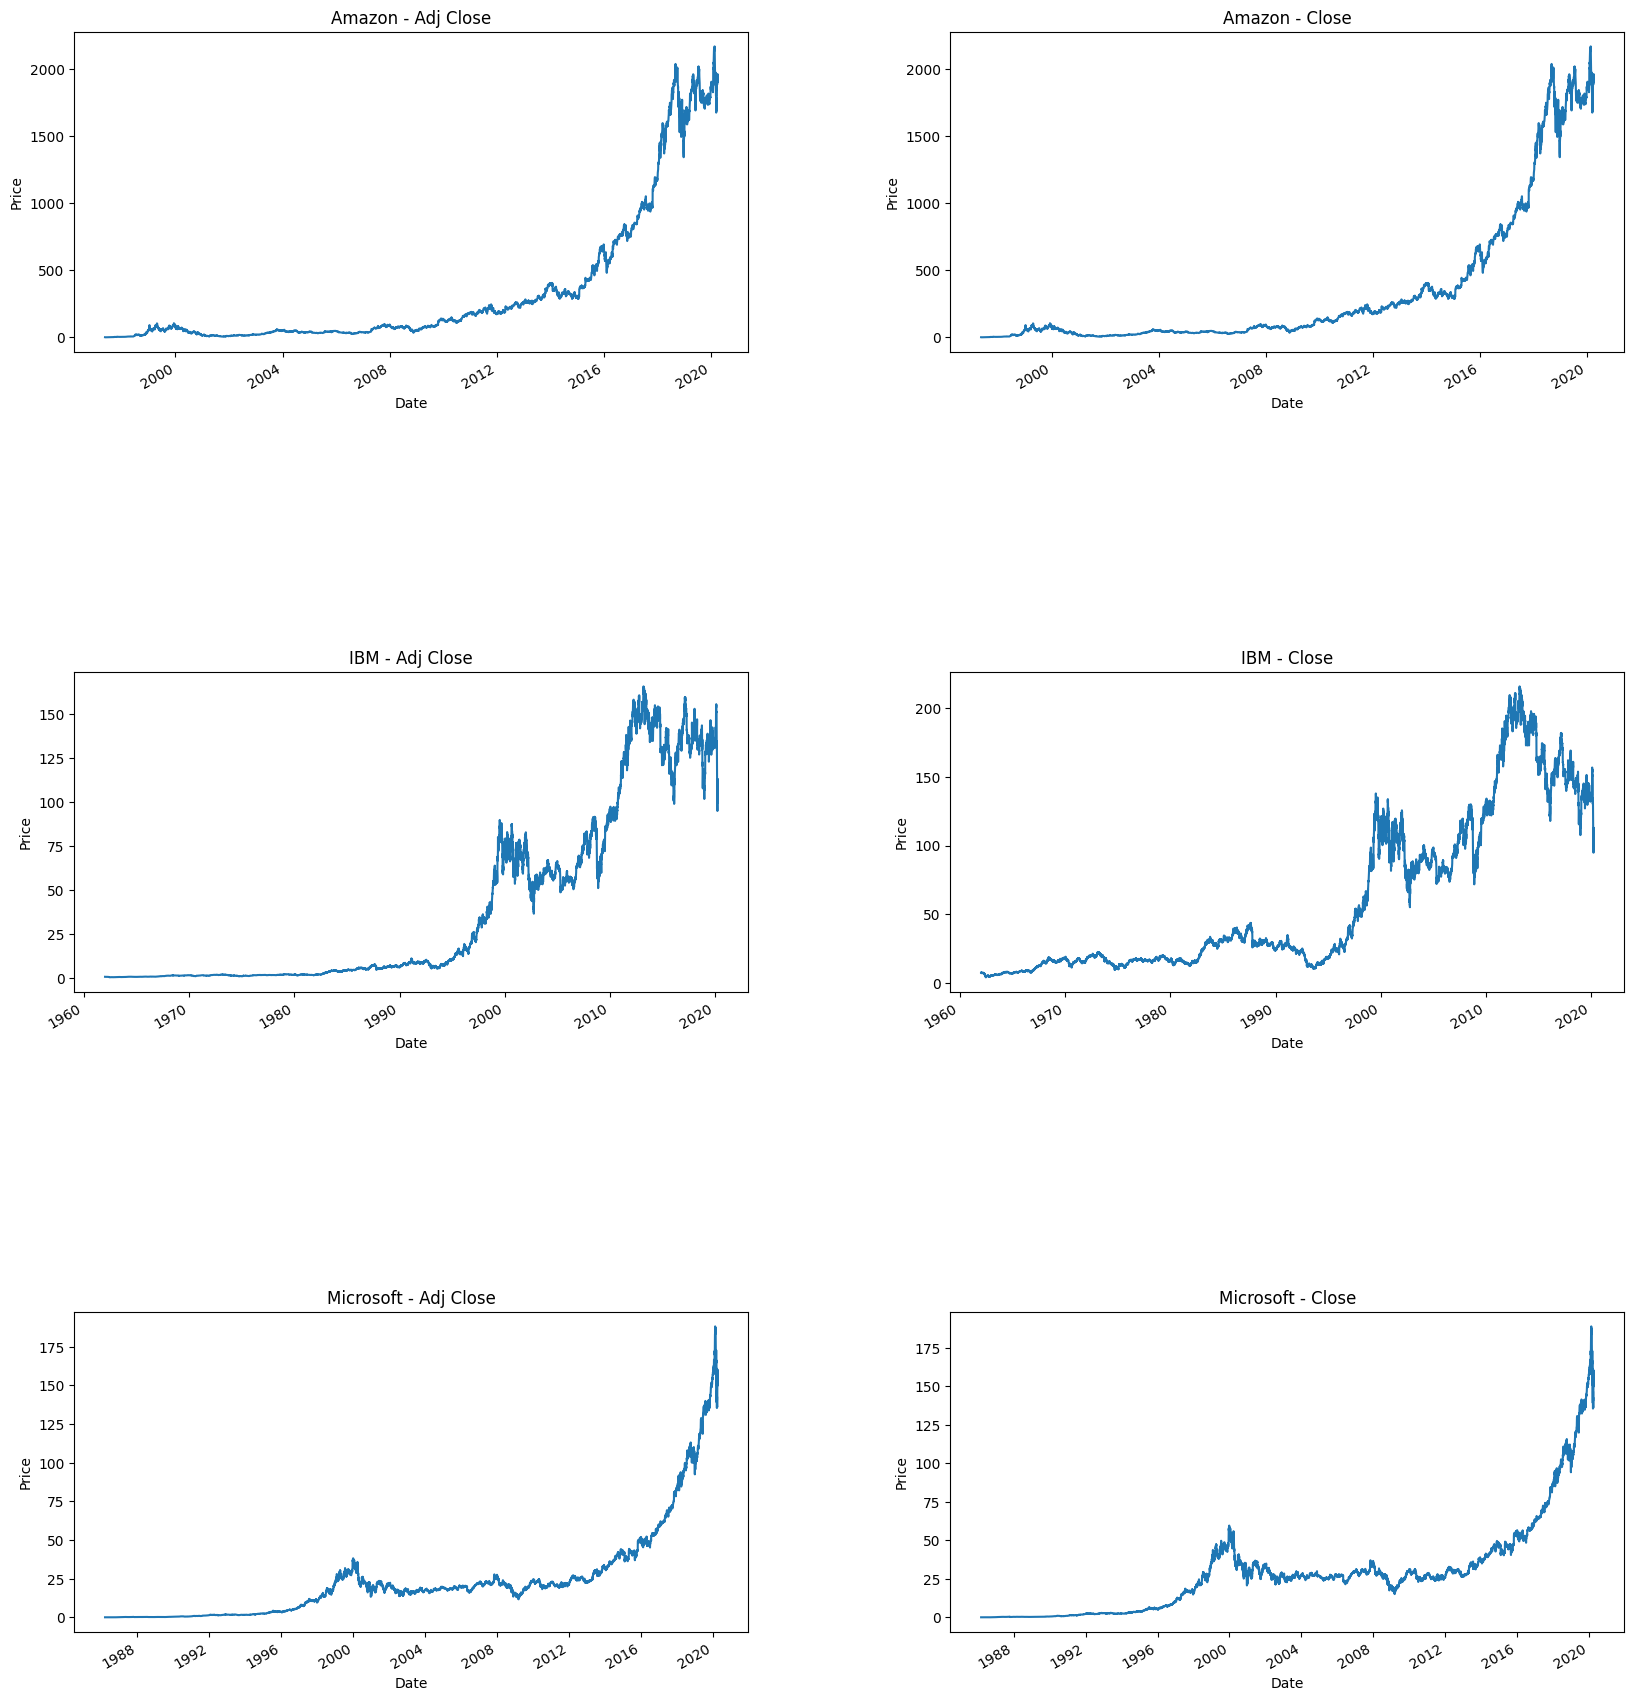

In [31]:
# Set up the plotting figure
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1, wspace=0.3, top=1, bottom=0.1)

# Iterate over the companies and plot their adjusted closing prices

for i, company in enumerate(companies, 1):   # 1 means index start with 1 instead of 0

    # Filter the data for the current company
    company_data = stock[stock['Company'] == company]

    # Create subplot for each company
    #3x2 grid --------

    # Plot for Adjusted Close price--------indexing 2 * i - 1
    plt.subplot(3, 2, 2 * i - 1)

    company_data['Adj Close'].plot()
    plt.title(f'{company} - Adj Close')
    plt.ylabel('Price')
    plt.xlabel('Date')

    # Plot for Close price---------------indexing 2 * i
    plt.subplot(3, 2, 2 * i)

    company_data['Close'].plot()
    plt.title(f'{company} - Close')
    plt.ylabel('Price')
    plt.xlabel('Date')

# Adjust layout and show the plot
plt.show()


# Price Volatility:

#Volatility helps assess the risk of an asset and is important for investors making buy/sell decisions.

#High vs. Low gives the daily price range (a measure of volatility).
#Close vs. Open can help measure price movement within the trading day.

 Rolling volatility (or moving standard deviation) measures the degree of variation or dispersion of stock returns over a fixed window of time. It helps track how risky or stable a stock has been over time.

In [32]:
import plotly.graph_objects as go

fig = go.Figure()

In [38]:
# List of unique companies
companies = stock['Company'].unique()

# Iterate over companies and plot High vs Low bar graphs
for company in companies:
    company_data = stock[stock['Company'] == company]  # Filter data for the current company

    # Create the figure
    fig = go.Figure()

    # Add High prices as a bar
    fig.add_trace(
        go.Bar(
            x=company_data.index,  # Dates on x-axis
            y=company_data['High'],  # High prices
            name=f"{company} High",
            marker_color='green'
        )
    )

    # Add Low prices as a bar
    fig.add_trace(
        go.Bar(
            x=company_data.index,  # Dates on x-axis
            y=company_data['Low'],  # Low prices
            name=f"{company} Low",
            marker_color='red'
        )
    )

    # Customize the layout
    fig.update_layout(
        title=f"High vs Low Prices for {company}",
        xaxis_title="Date",
        yaxis_title="Price",
        barmode='group',  # Group bars side by side
        xaxis=dict(tickangle=-45),  # Rotate x-axis labels for better visibility
        height=100,
        width=100
    )

    # Show the figure


    fig.show()

In [36]:
# Iterate over companies and plot Open vs Close bar graphs
for company in companies:
    company_data = stock[stock['Company'] == company]  # Filter data for the current company

    # Create the figure
    fig = go.Figure()

    # Add Open prices as a bar
    fig.add_trace(
        go.Bar(
            x=company_data.index,  # Dates on x-axis
            y=company_data['Open'],  # Open prices
            name=f"{company} Open",
            marker_color='blue'
        )
    )

    # Add Close prices as a bar
    fig.add_trace(
        go.Bar(
            x=company_data.index,  # Dates on x-axis
            y=company_data['Close'],  # Close prices
            name=f"{company} Close",
            marker_color='orange'
        )
    )

    # Customize the layout
    fig.update_layout(
        title=f"Open vs Close Prices for {company}",
        xaxis_title="Date",
        yaxis_title="Price",
        barmode='group',  # Group bars side by side
        xaxis=dict(tickangle=-45),  # Rotate x-axis labels for better visibility
        height=100,
        width=500
    )

    # Show the figure
    fig.show()


# Volume Trends:

In [39]:
# Investigate how trading volume affects price changes.
# High trading volumes often signal strong investor interest, and large price movements on high volume may indicate a trend or shift in market sentiment.

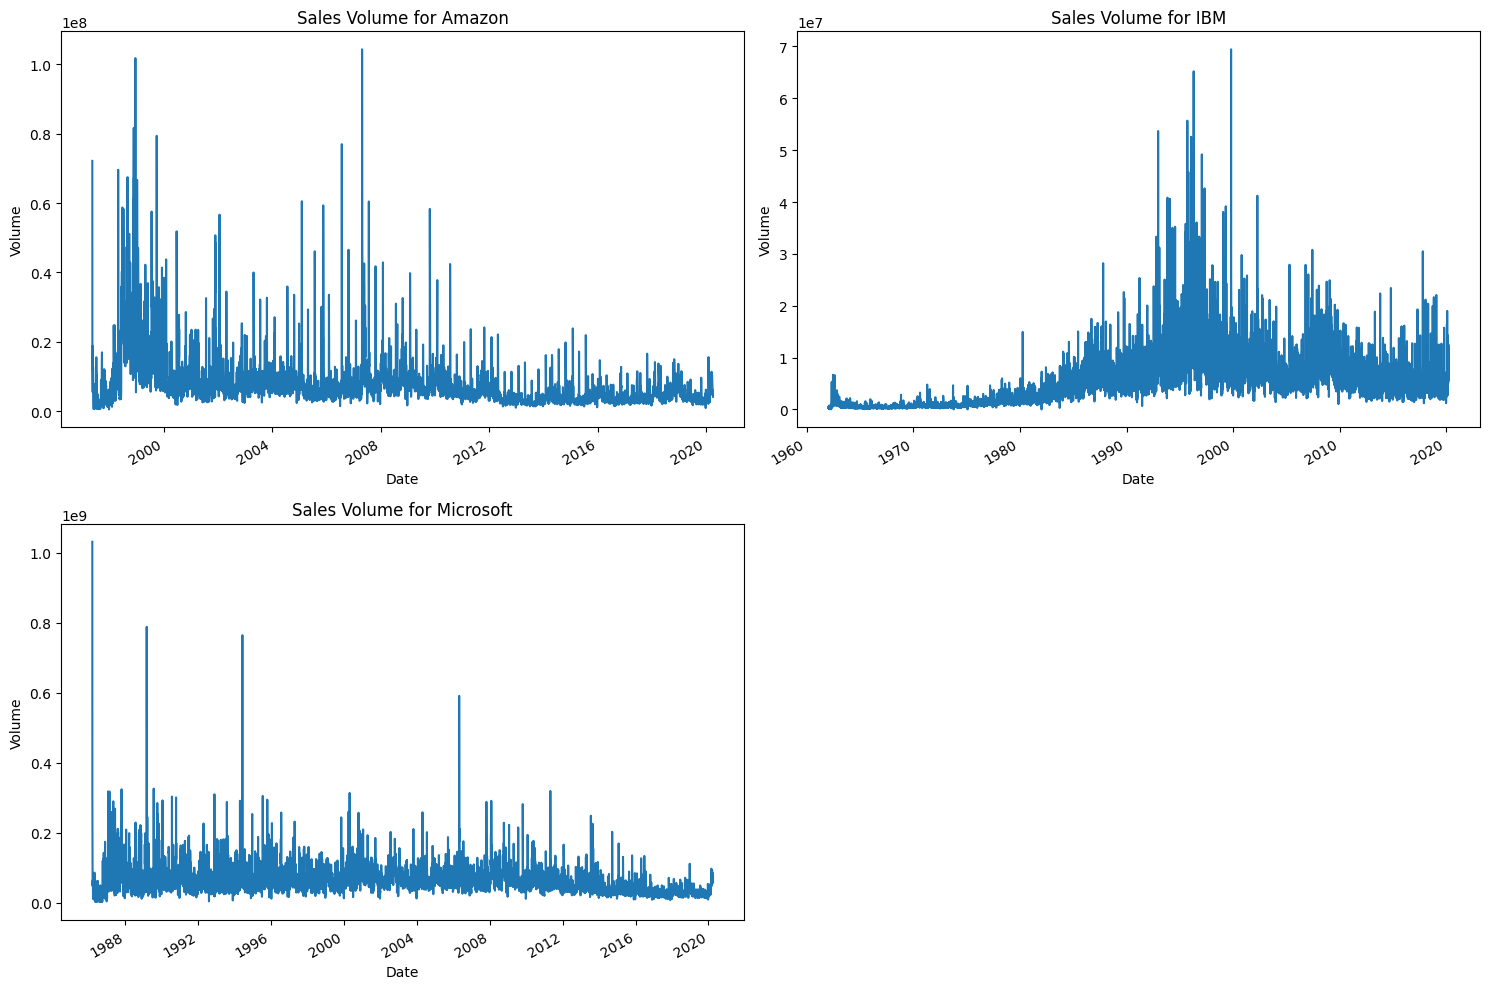

In [40]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

companies = ['Amazon', 'IBM', 'Microsoft']

for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]

    plt.subplot(2, 2, i)
    company_data['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {company}")

plt.tight_layout()

# Support and Resistance

A Volume Profile chart is a tool used in technical analysis to show the amount of volume traded at specific price levels over a certain period. It's commonly used to identify support and resistance levels based on where the highest volume has occurred at various price levels.

In [41]:
# Step 1: Set your price levels
price_bins = 50  # Number of price bins for the volume profile
price_min = stock['Close'].min()
price_max = stock['Close'].max()

# Create bins for price levels
bin_edges = pd.cut(stock['Close'], bins=price_bins, include_lowest=True, right=True)

# Step 2: Aggregate volume traded at each price level
volume_by_price = stock.groupby(bin_edges)['Volume'].sum()

# Step 3: Create a bar chart using plotly to represent the volume profile
fig = go.Figure()

fig.add_trace(go.Bar(
    x=volume_by_price.values,  # Volume values
    y=volume_by_price.index.astype(str),  # Price bins (as categorical)
    orientation='h',  # Horizontal bar chart
    marker_color='rgba(0,0,255,0.6)',  # Color of the bars
    name="Volume Profile"
))

# Add titles and labels
fig.update_layout(
    title="Volume Profile",
    xaxis_title="Volume",
    yaxis_title="Price Level",
    template="plotly_dark"
)

# Show the plot
fig.show()

# Moving Averages and Technical Indicators:

In [42]:
Use technical indicators such as moving averages (SMA, EMA) or Bollinger Bands to identify :
             trends, momentum, and potential price reversals.

These indicators help to smooth out daily fluctuations and identify broader price trends.

Simple Moving Average (SMA): Smoothen short-term fluctuations in price

Exponential Moving Average (EMA): React faster to recent price changes

SyntaxError: invalid syntax (<ipython-input-42-54d15d41f6e1>, line 1)

In [ ]:
#Date vs. Close (for calculating moving averages).
#Close vs. Volume (for momentum indicators like On-Balance Volume).

NameError: name 'Amazone' is not defined

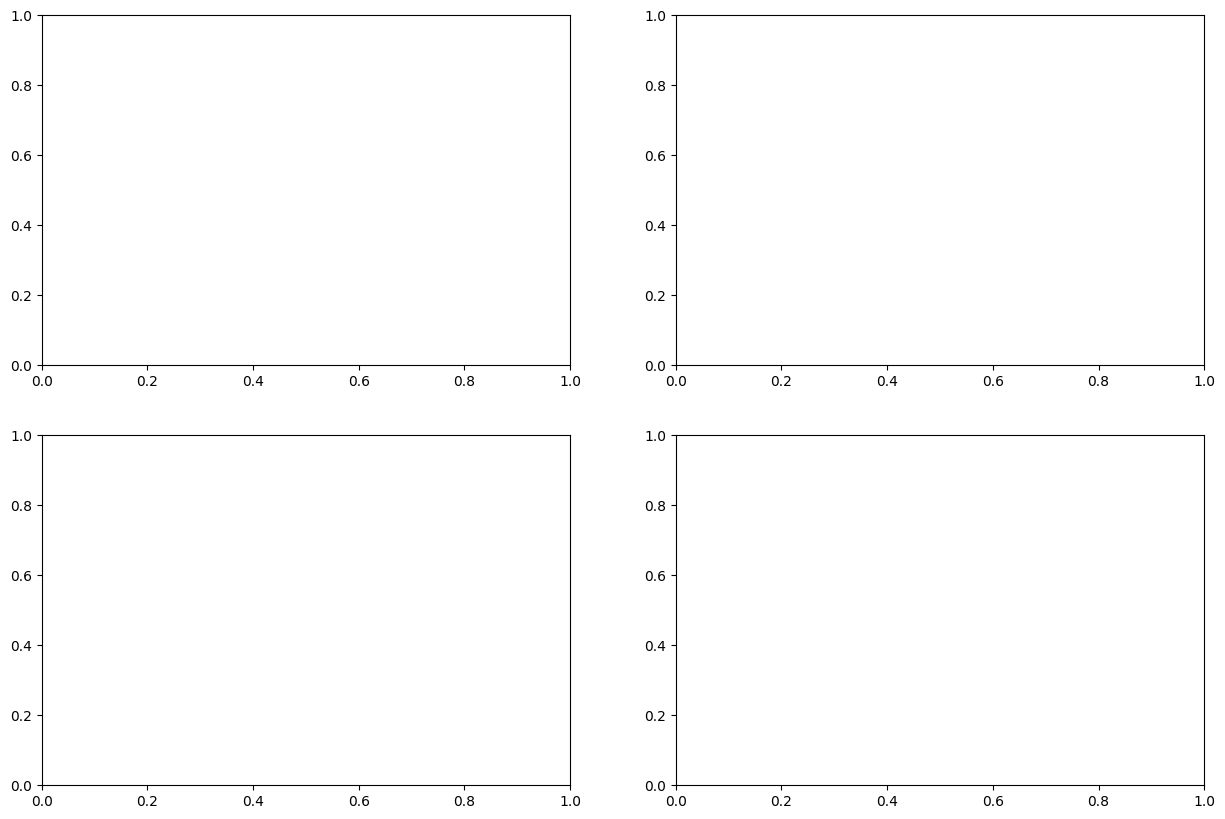

In [43]:
moving_avg_day = [10, 20, 50]
companies = ['Amazon', 'IBM', 'Microsoft']

for ma in moving_avg_day:

    company_data = stock[stock['Company'] == company]

    for company in companies:
        column_name = f"MA for {ma} days"
        company_data[column_name] = company_data['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

Amazone[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

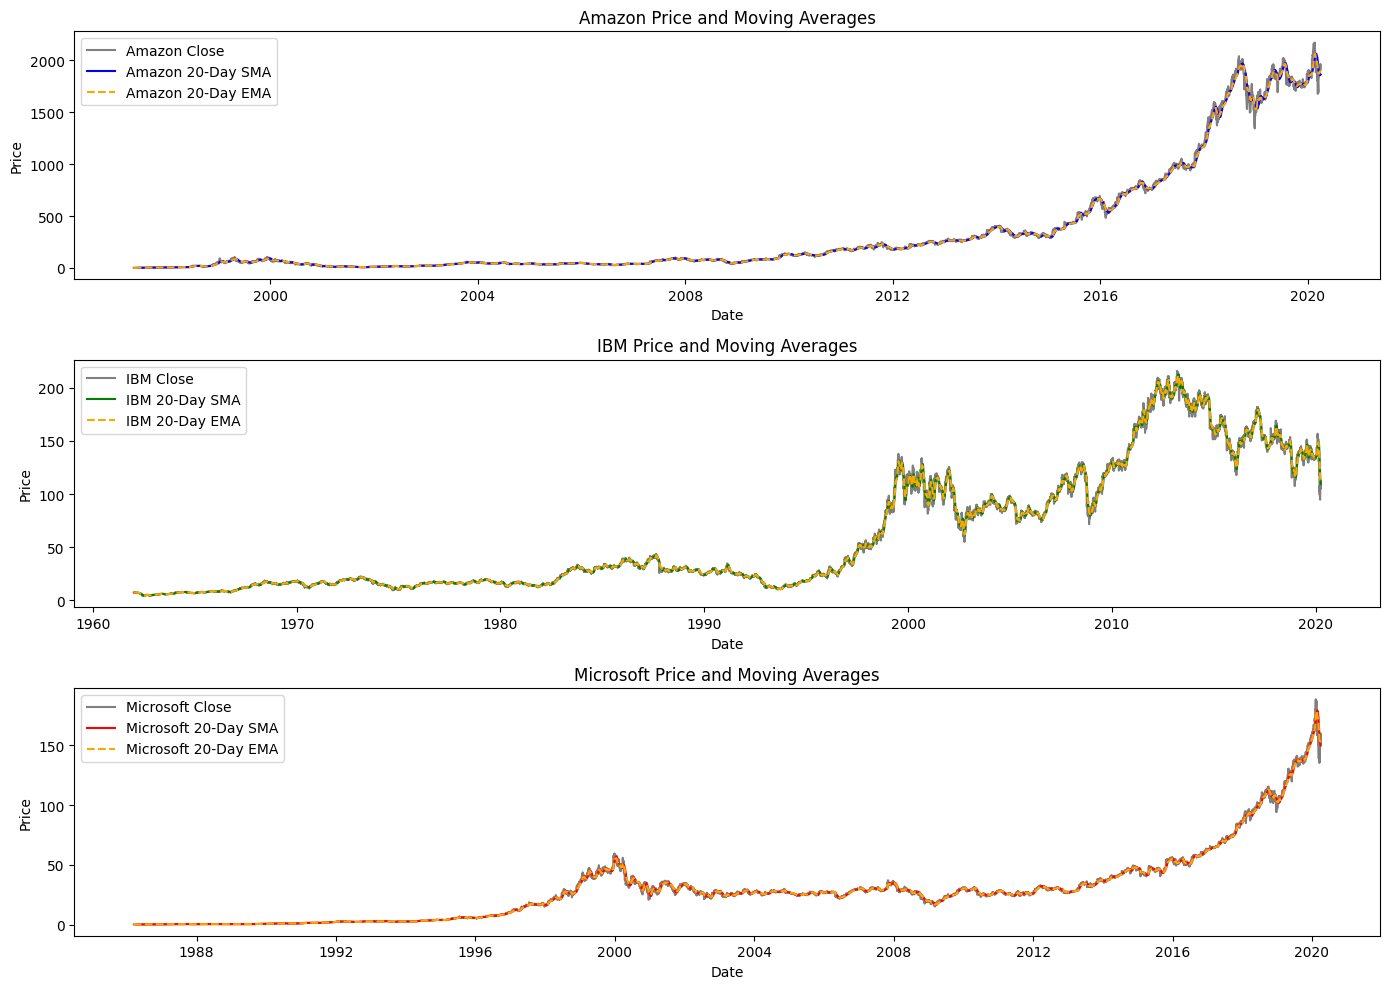

In [44]:
companies = ['Amazon', 'IBM', 'Microsoft']
stock_filtered = stock[stock['Company'].isin(companies)]

# Calculate SMA and EMA for each company
sma_window = 20  # 20-day moving average
ema_window = 20  # 20-day EMA

# Create an empty plot with multiple subplots
plt.figure(figsize=(14, 10))

# Define colors for plotting (one for each company)
colors = ['blue', 'green', 'red']

for i, company in enumerate(companies, 1):
    company_data = stock_filtered[stock_filtered['Company'] == company]

    # Calculate SMA and EMA
    company_data['SMA'] = company_data['Close'].rolling(window=sma_window).mean()
    company_data['EMA'] = company_data['Close'].ewm(span=ema_window, adjust=False).mean()

    # Create a subplot for each company
    plt.subplot(len(companies), 1, i)
    plt.plot(company_data.index, company_data['Close'], label=f'{company} Close', color='black', alpha=0.5)
    plt.plot(company_data.index, company_data['SMA'], label=f'{company} {sma_window}-Day SMA', color=colors[i - 1])
    plt.plot(company_data.index, company_data['EMA'], label=f'{company} {ema_window}-Day EMA', color='orange', linestyle='--')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{company} Price and Moving Averages')
    plt.legend()

plt.tight_layout()
plt.show()

# Correlation Analysis:

In [ ]:
# Correlation with Volume
# Check how trading volume correlates with price movement

Correlation between Volume and Daily Returns:
                 Volume  Daily Returns
Volume         1.000000      -0.027903
Daily Returns -0.027903       1.000000


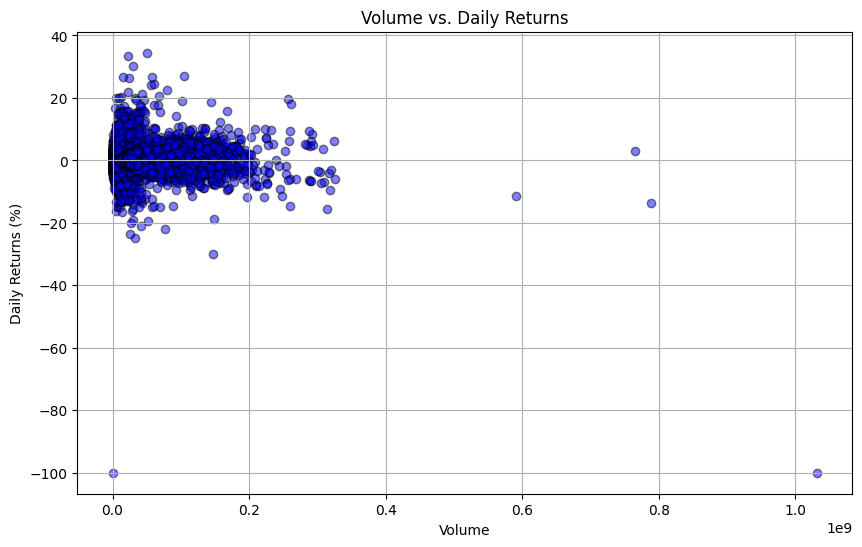

In [45]:
# Calculate Daily Returns
stock['Daily Returns'] = stock['Adj Close'].pct_change() * 100  # Change in percentage

# Compute the correlation between 'Volume' and 'Daily Returns'
correlation = stock[['Volume', 'Daily Returns']].corr()
print(f"Correlation between Volume and Daily Returns:\n{correlation}")

# Plot scatter plot for Volume vs. Daily Returns
plt.figure(figsize=(10, 6))
plt.scatter(stock['Volume'], stock['Daily Returns'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Volume vs. Daily Returns')
plt.xlabel('Volume')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.show()

In [47]:
import seaborn as sns

Correlation matrix for Amazon:
                 Volume  Daily Returns
Volume         1.000000       0.169269
Daily Returns  0.169269       1.000000
----------------------------------------
Correlation matrix for IBM:
                 Volume  Daily Returns
Volume         1.000000       0.001712
Daily Returns  0.001712       1.000000
----------------------------------------
Correlation matrix for Microsoft:
                 Volume  Daily Returns
Volume         1.000000      -0.126052
Daily Returns -0.126052       1.000000
----------------------------------------


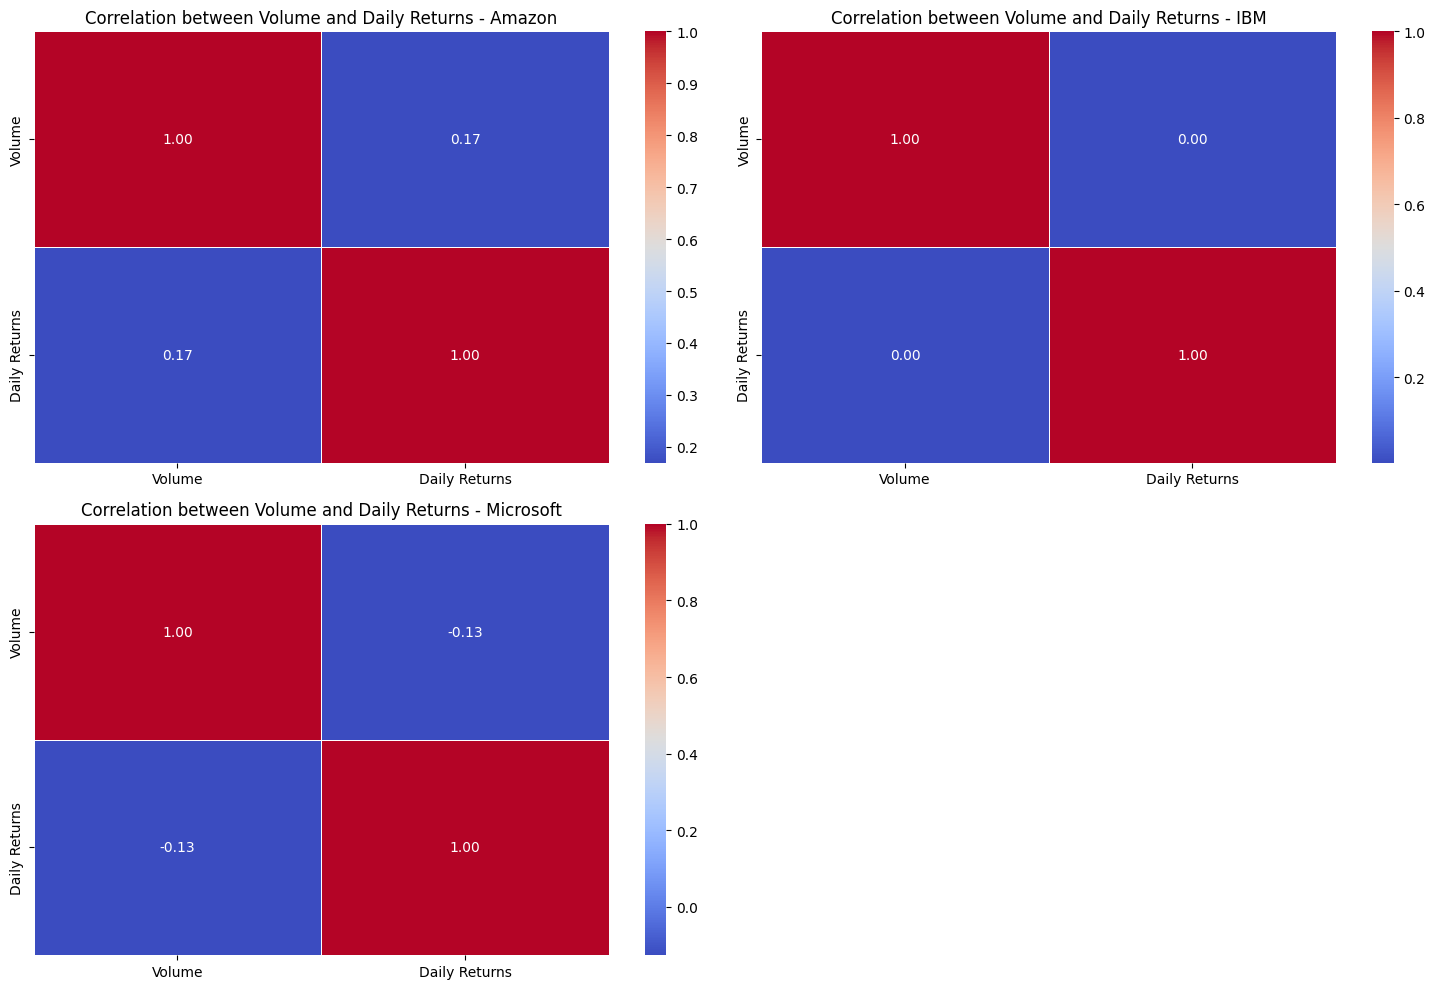

In [48]:
# List of companies you want to analyze
companies = stock['Company'].unique()

# Create a figure for plotting
plt.figure(figsize=(15, 10))

# Loop through each company and analyze correlation with Volume
for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]

    # Calculate the correlation matrix for Volume and Daily Returns
    corr_matrix = company_data[['Volume', 'Daily Returns']].corr()

    # Print the correlation for each company
    print(f"Correlation matrix for {company}:")
    print(corr_matrix)
    print("-" * 40)

    # Plot the correlation matrix as a heatmap
    plt.subplot(2, 2, i)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation between Volume and Daily Returns - {company}')

plt.tight_layout()
plt.show()

In [ ]:
# Identify Seasonality and Cycles:

# Daily return of the stock

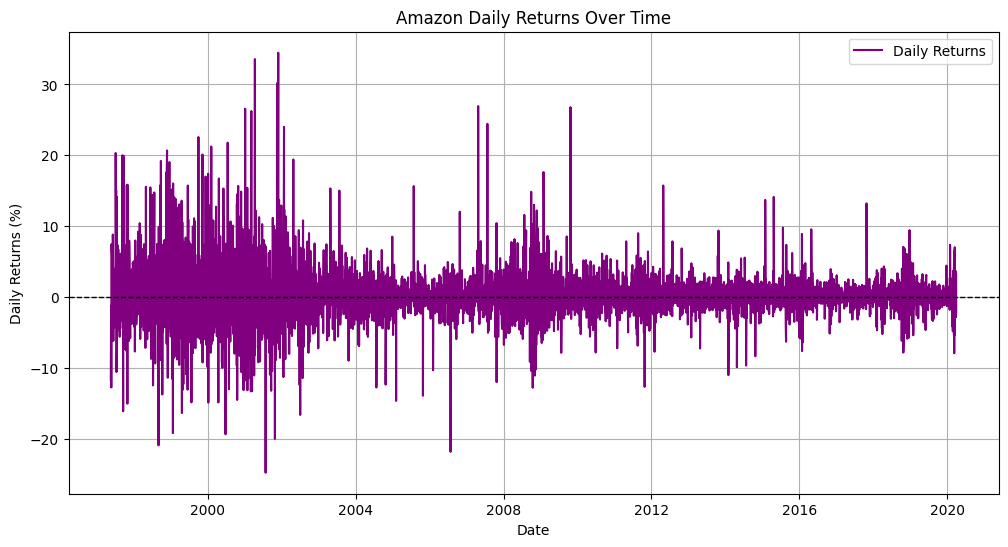

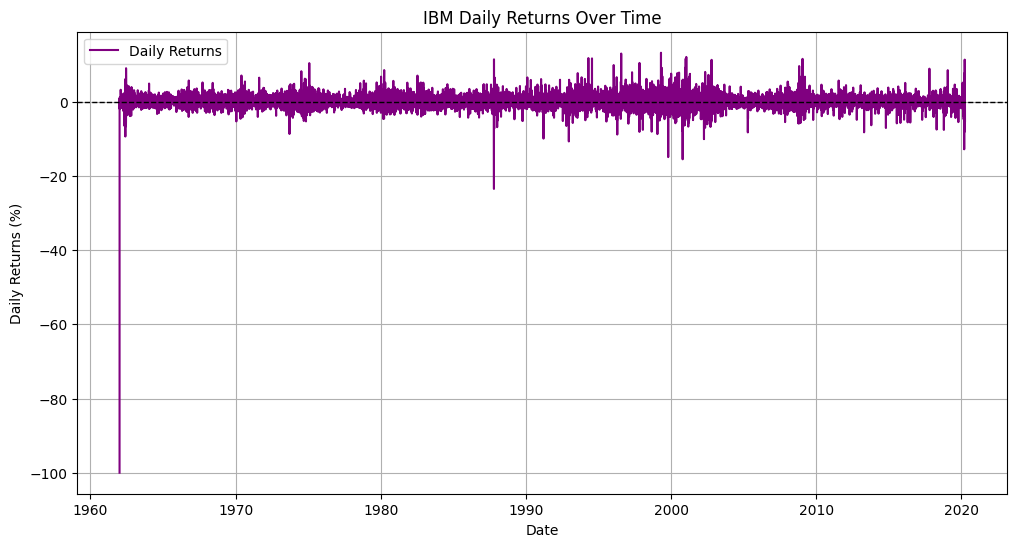

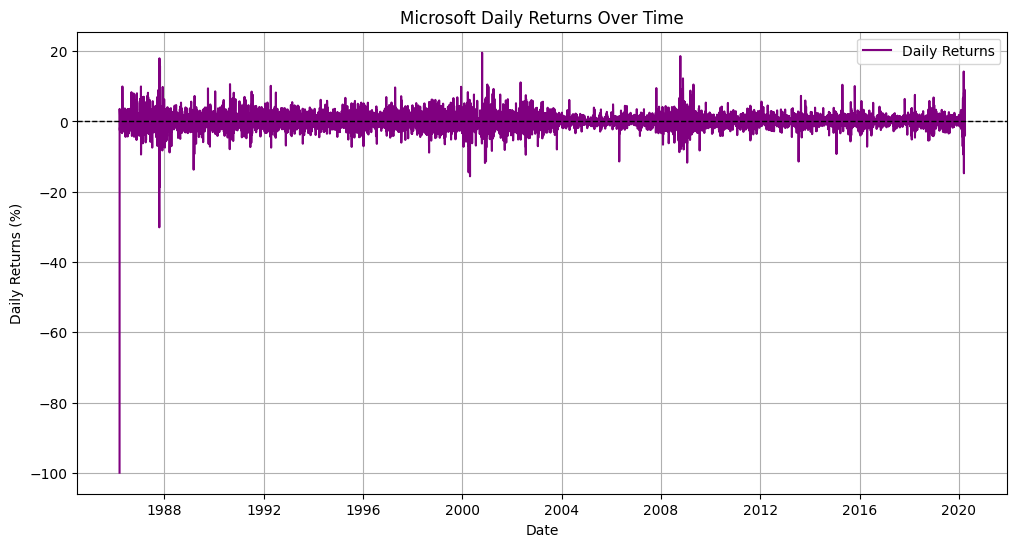

In [49]:
# Filter for the selected companies
companies = ['Amazon', 'IBM', 'Microsoft']
stock_filtered = stock[stock['Company'].isin(companies)]

# Calculate daily returns for all data
stock_filtered['Daily Returns'] = stock_filtered['Adj Close'].pct_change() * 100

# Iterate through each company and generate a line chart
for company in companies:
    # Filter data for the current company
    company_data = stock_filtered[stock_filtered['Company'] == company]

    # Plot daily returns as a line chart
    plt.figure(figsize=(12, 6))
    plt.plot(company_data.index, company_data['Daily Returns'], label='Daily Returns', color='purple')
    plt.axhline(0, linestyle='--', color='black', linewidth=1)  # Add a reference line at 0
    plt.title(f'{company} Daily Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns (%)')
    plt.legend()
    plt.grid()
    plt.show()

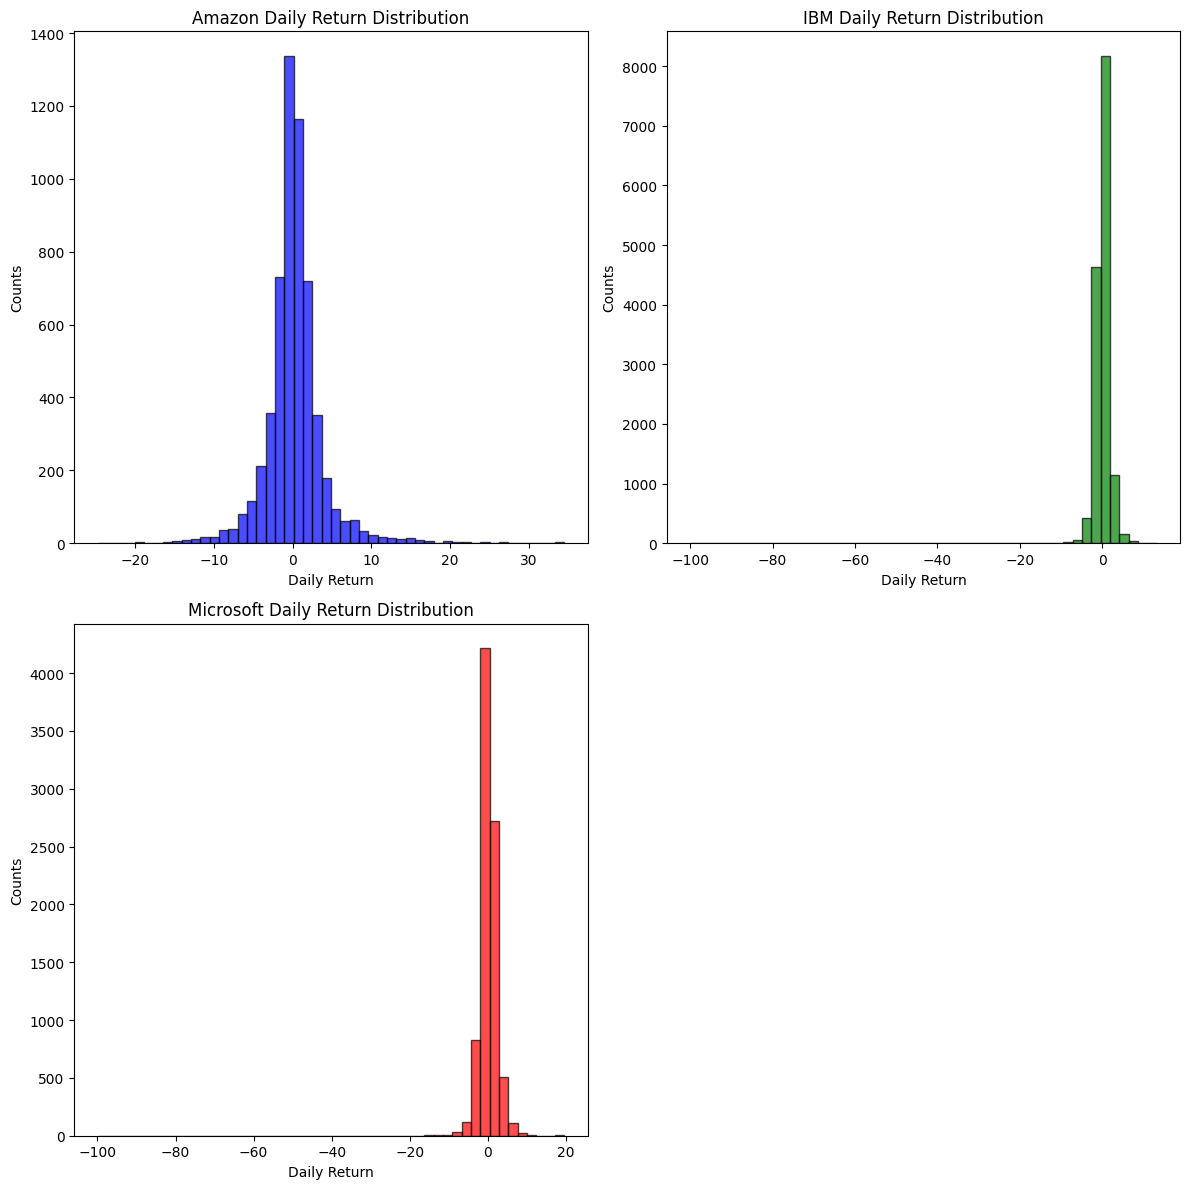

In [50]:
companies = ['Amazon', 'IBM', 'Microsoft']
colors = ['blue', 'green', 'red']

stock_filtered = stock[stock['Company'].isin(companies)]

# Calculate daily returns for all data
stock_filtered['Daily Returns'] = stock_filtered['Adj Close'].pct_change() * 100

plt.figure(figsize=(12, 12))

# Plot histograms for each company's daily return
for i, company in enumerate(companies, 1):

    # Filter data for the current company
    company_data = stock_filtered[stock_filtered['Company'] == company]

    # Create a subplot
    plt.subplot(2, 2, i)
    plt.hist(company_data['Daily Returns'].dropna(), bins=50, color=colors[i - 1], alpha=0.7, edgecolor='black')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company} Daily Return Distribution')

plt.tight_layout()
plt.show()

# Trend Detection

In [ ]:
# Identify long-term trends using moving averages (e.g., SMA or EMA for 50 and 200 days):

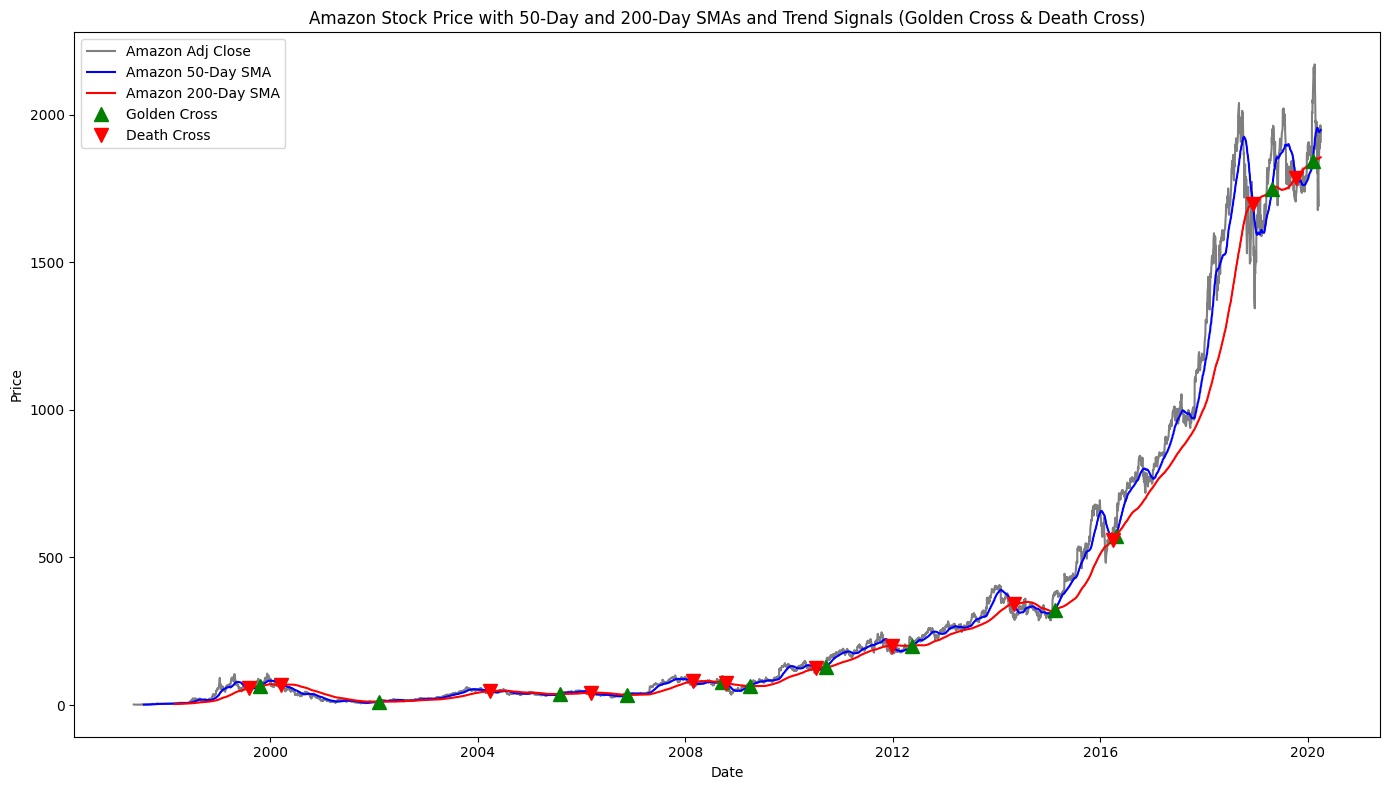

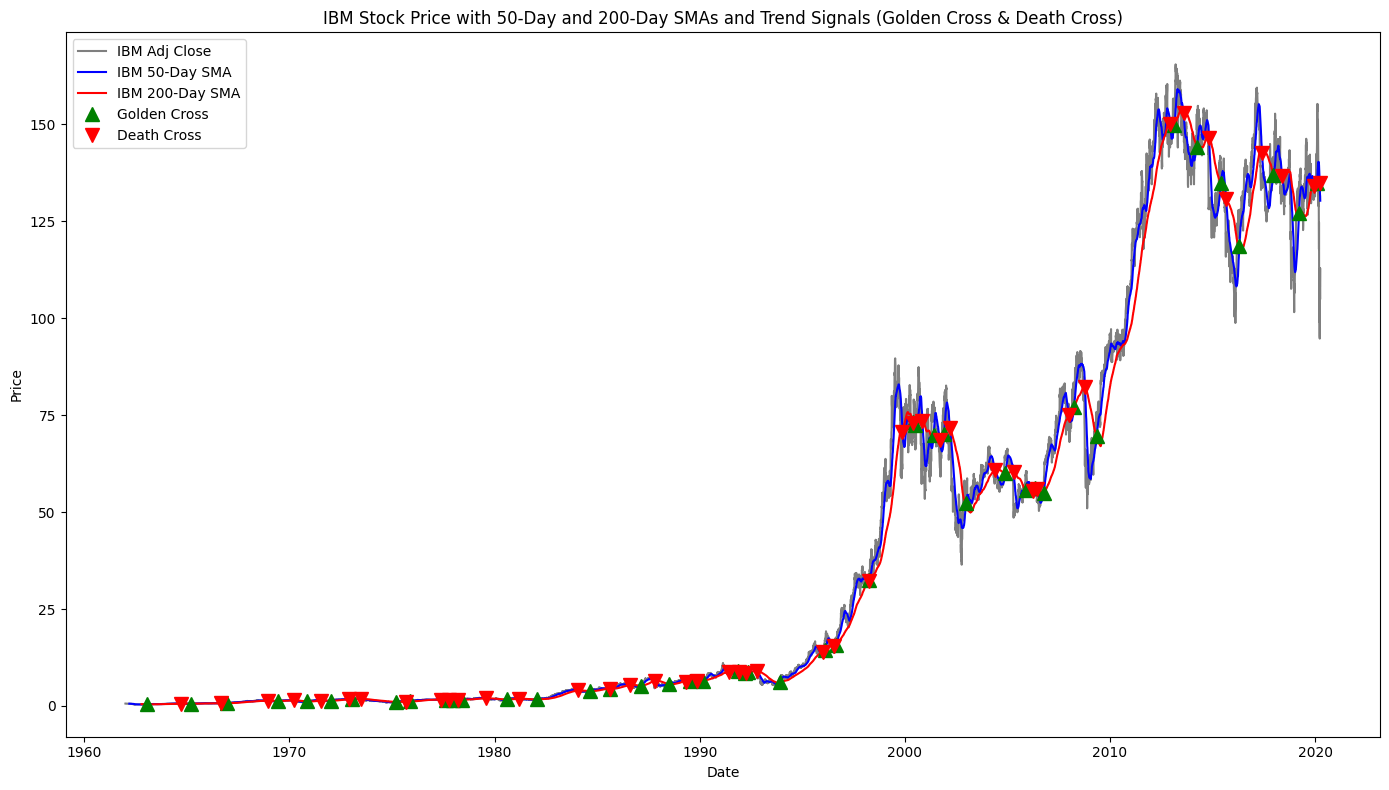

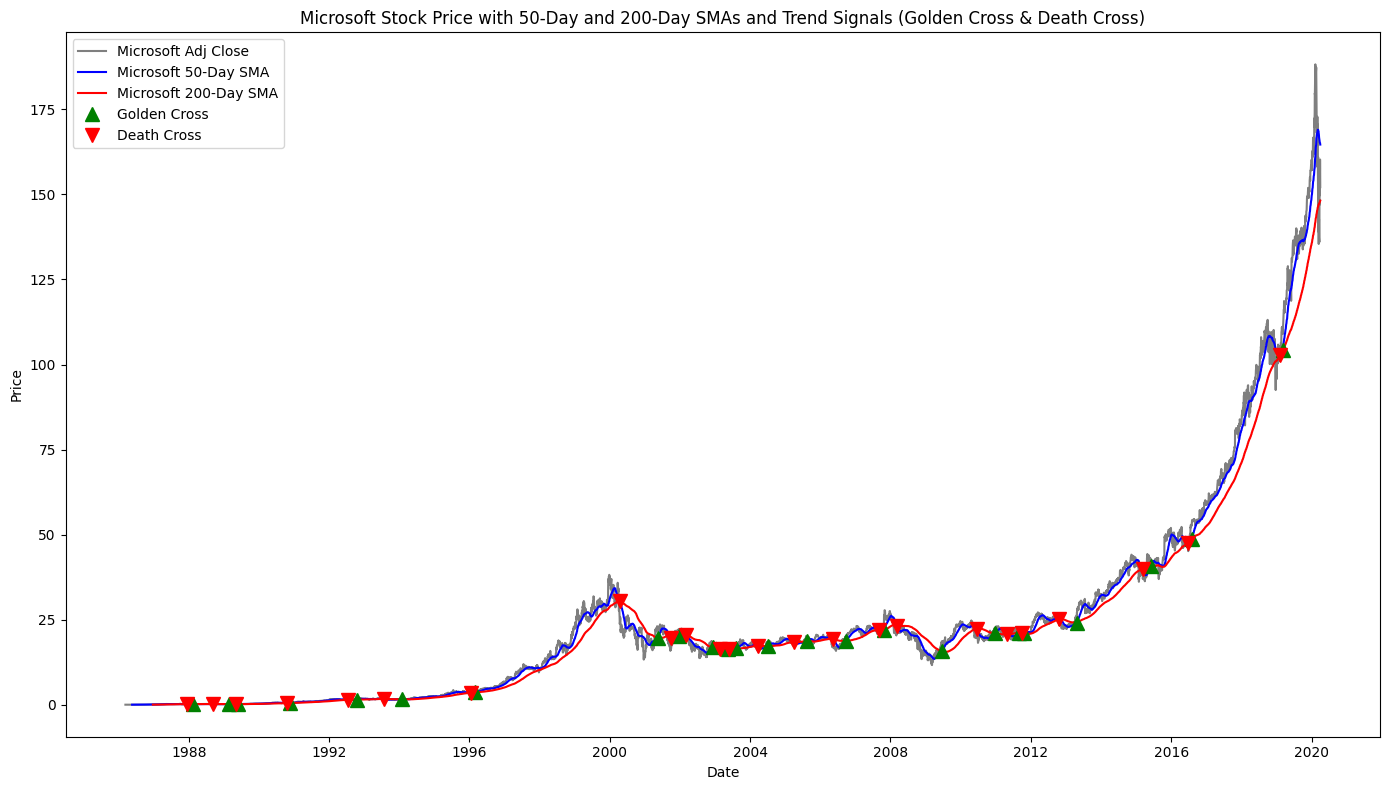

In [51]:
# List of companies to analyze
companies = stock['Company'].unique()

# Loop through each company
for company in companies:
    # Filter data for the current company
    company_data = stock[stock['Company'] == company]

    # Calculate 50-day and 200-day SMA for the current company
    company_data['SMA_50'] = company_data['Adj Close'].rolling(window=50).mean()
    company_data['SMA_200'] = company_data['Adj Close'].rolling(window=200).mean()

    # Detect Golden Cross (SMA_50 crosses above SMA_200)
    company_data['Golden_Cross'] = (company_data['SMA_50'] > company_data['SMA_200']) & (company_data['SMA_50'].shift(1) <= company_data['SMA_200'].shift(1))

    # Detect Death Cross (SMA_50 crosses below SMA_200)
    company_data['Death_Cross'] = (company_data['SMA_50'] < company_data['SMA_200']) & (company_data['SMA_50'].shift(1) >= company_data['SMA_200'].shift(1))

    # Plotting the price data along with the SMAs for the current company
    plt.figure(figsize=(14, 8))
    plt.plot(company_data['Adj Close'], label=f'{company} Adj Close', color='black', alpha=0.5)
    plt.plot(company_data['SMA_50'], label=f'{company} 50-Day SMA', color='blue')
    plt.plot(company_data['SMA_200'], label=f'{company} 200-Day SMA', color='red')

    # Highlight Golden Cross and Death Cross for the current company
    plt.plot(company_data[company_data['Golden_Cross']].index, company_data['SMA_50'][company_data['Golden_Cross']], '^', markersize=10, color='green', lw=0, label='Golden Cross')
    plt.plot(company_data[company_data['Death_Cross']].index, company_data['SMA_50'][company_data['Death_Cross']], 'v', markersize=10, color='red', lw=0, label='Death Cross')

    # Add labels and title for the current company's plot
    plt.title(f'{company} Stock Price with 50-Day and 200-Day SMAs and Trend Signals (Golden Cross & Death Cross)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

#  Momentum Indicators

In [ ]:
# Relative Strength Index (RSI):

Measures the speed and change of price movements


In [52]:
for company in stock['Company'].unique():
    company_data = stock[stock['Company'] == company]

    # Calculate RSI for this company's data (as above)
    company_data['delta'] = company_data['Adj Close'].diff(1)
    company_data['gain'] = company_data['delta'].where(company_data['delta'] > 0, 0)
    company_data['loss'] = -company_data['delta'].where(company_data['delta'] < 0, 0)
    company_data['avg_gain'] = company_data['gain'].rolling(window=14).mean()
    company_data['avg_loss'] = company_data['loss'].rolling(window=14).mean()
    company_data['RS'] = company_data['avg_gain'] / company_data['avg_loss']
    company_data['RSI'] = 100 - (100 / (1 + company_data['RS']))

    # Update the main dataframe
    stock.loc[stock['Company'] == company, 'RSI'] = company_data['RSI']

In [53]:
stock.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

           Company  Daily Returns  RSI  
Date                                    
1997-05-15  Amazon            NaN  NaN  
1997-05-16  Amazon     -11.702131  NaN  
1997-05-19  Amazon      -1.204815  NaN  
1997-05-20  Amazon      -4.268297  NaN  
1997-05-21  Amazon     -12.738849  NaN

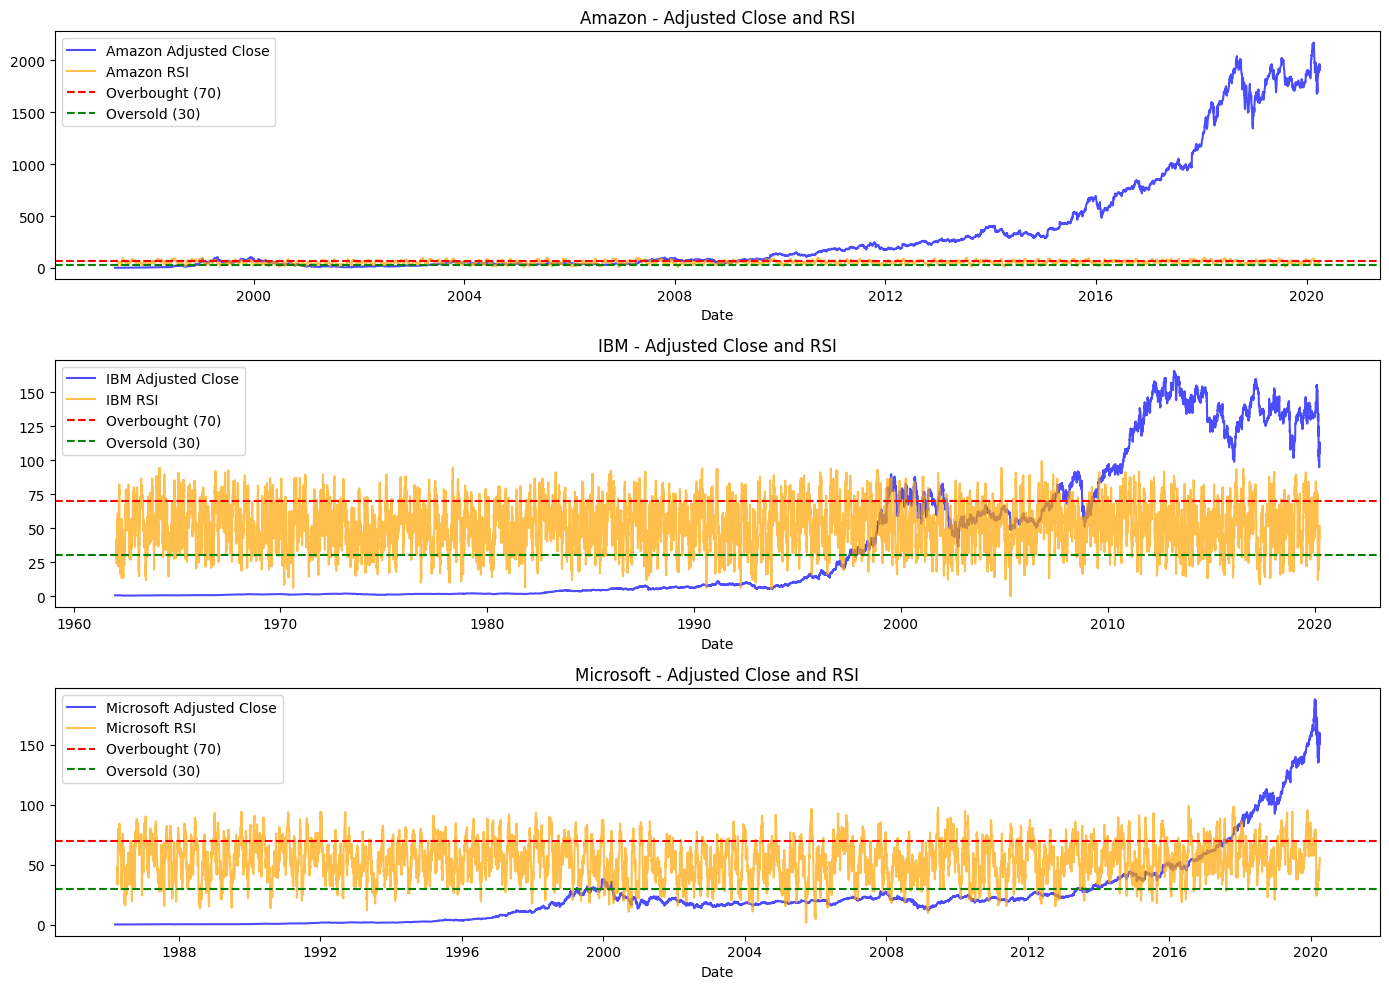

In [54]:
# List of unique companies to iterate over
companies = stock['Company'].unique()

# Set the figure size for plotting
plt.figure(figsize=(14, 10))

# Iterate over each company and create a plot for each
for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]

    # Create a subplot for each company (2 rows, 1 column)
    plt.subplot(len(companies), 1, i)

    # Plot Adjusted Close Price
    plt.plot(company_data.index, company_data['Adj Close'], label=f'{company} Adjusted Close', color='blue', alpha=0.7)

    # Plot RSI (Add a horizontal line at 70 and 30 for overbought/oversold conditions)
    plt.plot(company_data.index, company_data['RSI'], label=f'{company} RSI', color='orange', alpha=0.7)
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    # Add labels, title, and legend
    plt.xlabel('Date')
    plt.title(f'{company} - Adjusted Close and RSI')
    plt.legend(loc='upper left')

# Adjust the layout to make room for all subplots
plt.tight_layout()

# Show the plots
plt.show()

# Drawdowns

In [55]:
# Calculate daily returns
stock['Daily Returns'] = stock['Adj Close'].pct_change() * 100

# Calculate cumulative returns
stock['Cumulative Returns'] = (1 + stock['Daily Returns'] / 100).cumprod()

# Calculate drawdown (decline from peak to trough)
stock['Drawdown'] = stock['Cumulative Returns'] / stock['Cumulative Returns'].cummax() - 1

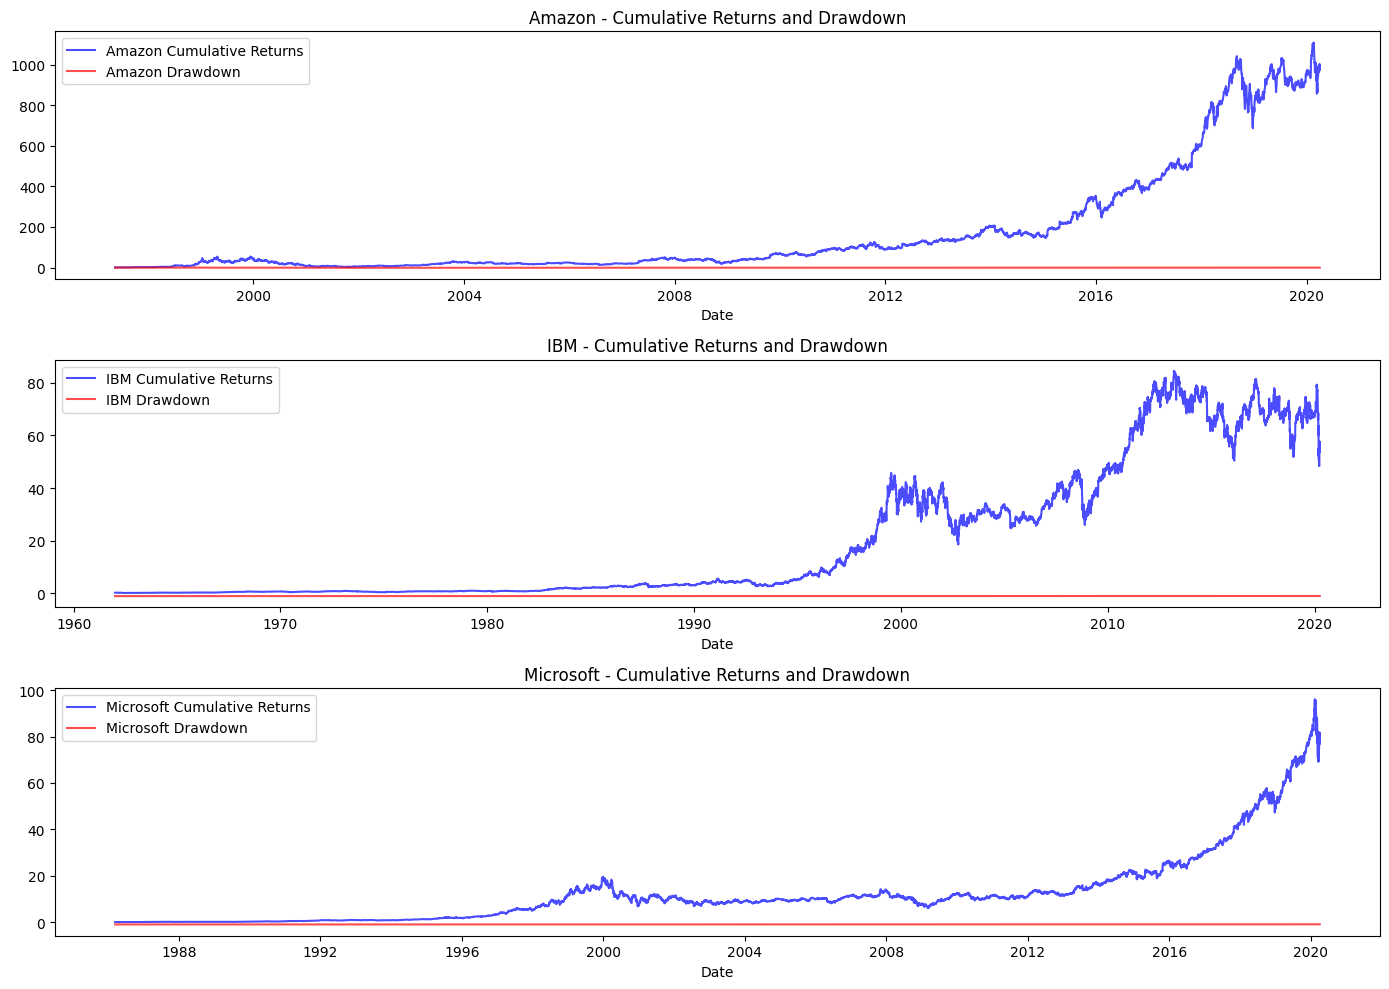

In [56]:
# List of unique companies to iterate over
companies = stock['Company'].unique()

# Set the figure size for plotting
plt.figure(figsize=(14, 10))

# Iterate over each company and create a plot for each
for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]

    # Create a subplot for each company (1 row, 1 column)
    plt.subplot(len(companies), 1, i)

    # Plot Cumulative Returns
    plt.plot(company_data.index, company_data['Cumulative Returns'], label=f'{company} Cumulative Returns', color='blue', alpha=0.7)

    # Plot Drawdown
    plt.plot(company_data.index, company_data['Drawdown'], label=f'{company} Drawdown', color='red', alpha=0.7)

    # Add labels, title, and legend
    plt.xlabel('Date')
    plt.title(f'{company} - Cumulative Returns and Drawdown')
    plt.legend(loc='upper left')

# Adjust the layout to make room for all subplots
plt.tight_layout()

# Show the plots
plt.show()

# Sharpe Ratio:

In [57]:
# Calculate daily returns if not already calculated
stock['Daily Returns'] = stock['Adj Close'].pct_change() * 100

# Calculate the mean return and standard deviation of daily returns
mean_return = stock['Daily Returns'].mean()
std_dev = stock['Daily Returns'].std()

# Calculate the Sharpe Ratio (assuming risk-free rate is 0%)
sharpe_ratio = mean_return / std_dev
print(f'Sharpe Ratio: {sharpe_ratio}')

Sharpe Ratio: 0.03570922063639793


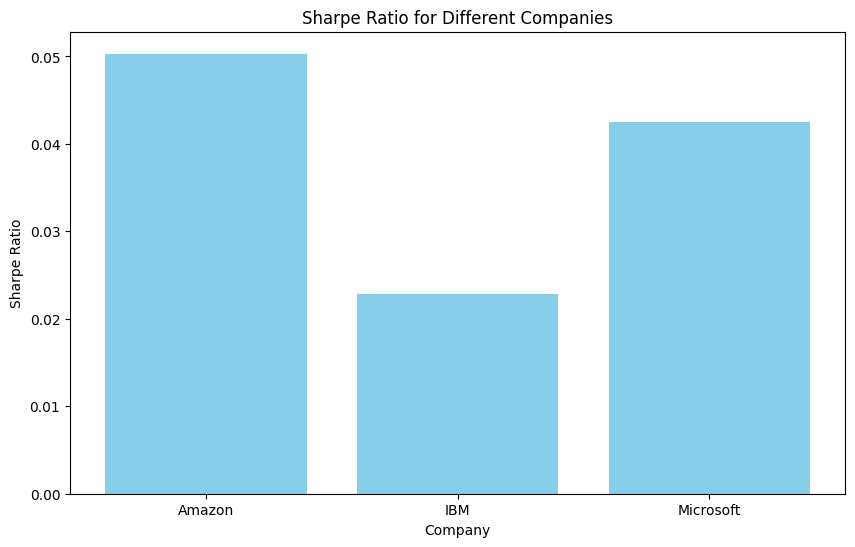

In [58]:
# List of unique companies to iterate over
companies = stock['Company'].unique()

# Create an empty dictionary to store Sharpe ratios for each company
sharpe_ratios = {}

# Calculate Sharpe ratio for each company
for company in companies:
    company_data = stock[stock['Company'] == company]
    mean_return = company_data['Daily Returns'].mean()
    std_dev = company_data['Daily Returns'].std()
    sharpe_ratios[company] = mean_return / std_dev

# Plotting the Sharpe Ratio for each company
plt.figure(figsize=(10, 6))
plt.bar(sharpe_ratios.keys(), sharpe_ratios.values(), color='skyblue')
plt.title('Sharpe Ratio for Different Companies')
plt.xlabel('Company')
plt.ylabel('Sharpe Ratio')
plt.show()

# How much value do we put at risk by investing in a particular stock?

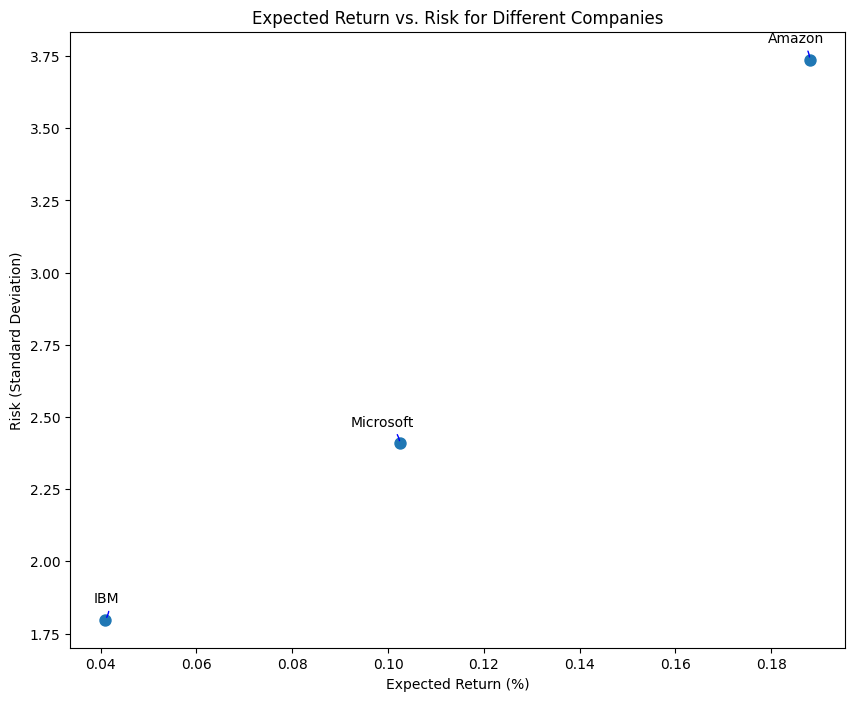

In [59]:
# Calculate daily returns if not already calculated
stock['Daily Returns'] = stock['Adj Close'].pct_change() * 100

# Remove NaN values for calculations
rets = stock.groupby('Company')['Daily Returns'].apply(lambda x: x.dropna())

# Create a figure
plt.figure(figsize=(10, 8))

# Calculate mean return and standard deviation (risk) for each company
mean_returns = rets.groupby('Company').mean()
std_returns = rets.groupby('Company').std()

# Scatter plot for expected return vs. risk
area = np.pi * 20  # Size of points
plt.scatter(mean_returns, std_returns, s=area)

# Labels and titles
plt.xlabel('Expected Return (%)')
plt.ylabel('Risk (Standard Deviation)')

# Annotate each point with the company name
for label, x, y in zip(mean_returns.index, mean_returns, std_returns):
    plt.annotate(label, xy=(x, y), xytext=(10, 10), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Show the plot
plt.title('Expected Return vs. Risk for Different Companies')
plt.show()

In [ ]:
#Normalizing the data

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
close= stock['Close']

In [62]:
type(close)

pandas.core.series.Series

In [63]:
scaler = MinMaxScaler()
#MinMaxScaler requires a 2D array where each row is a sample and each column is a feature.
#//close = scaler.fit_transform(close.reshape(-1, 1))  # If `close` is a NumPy array
close = scaler.fit_transform(close.values.reshape(-1, 1))
close

array([[0.0008608 ],
       [0.0007552 ],
       [0.0007456 ],
       ...,
       [0.07379269],
       [0.07263148],
       [0.07005099]])

In [64]:
print(close.shape)

(29005, 1)


In [65]:
training_size=int(len(close)*0.60)
test_size=len(close)-training_size

train_data,test_data=close[0:training_size,:],close[training_size:len(close),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (17403, 1)
test_data:  (11602, 1)


In [ ]:
#Transform Close price base on Time-series-analysis forecasting requirement¶

In [66]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX), np.array(dataY)

In [ ]:
#Prepare Data for train and test

In [67]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (17387, 15)
y_train:  (17387,)
X_test:  (11586, 15)
y_test (11586,)


In [68]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (17387, 15, 1)
X_test:  (11586, 15, 1)


In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

In [70]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.20))
model.add(Dense(1))


model.compile(loss='mean_squared_error',optimizer='adam')

In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 15, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 15, 32)              │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,065 (62.75 KB)

 Trainable params: 16,065 (62.75 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0017 - val_loss: 2.5654e-06
Epoch 2/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.9997e-04 - val_loss: 1.8743e-05
Epoch 3/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 3.8155e-04 - val_loss: 9.6757e-06
Epoch 4/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 3.6355e-04 - val_loss: 2.8494e-05
Epoch 5/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 3.2871e-04 - val_loss: 3.8633e-06
Epoch 6/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3.5435e-04 - val_loss: 6.0136e-06
Epoch 7/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.8978e-04 - val_loss: 4.0174e-06
Epoch 8/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.1252e-04 - val_loss: 1.6072e-05
Epoch 9/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.2452e-04 - val_loss: 2.5302e-05
Epoch 10/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.8299e-04 - val_loss: 6.1387e-06
Epoch 11/200
544/544 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms

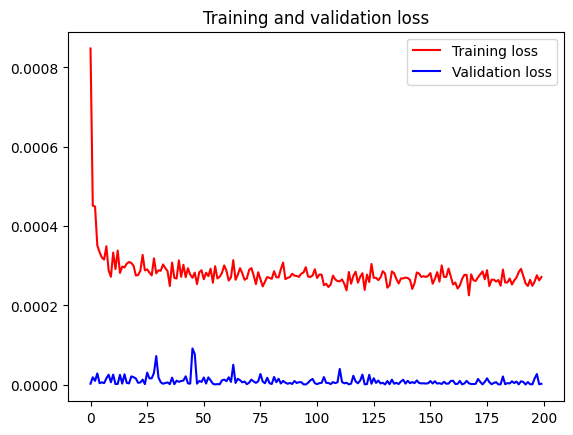

<Figure size 640x480 with 0 Axes>

In [73]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


In [74]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((17387, 1), (11586, 1))

In [ ]:
#Model Evaluation

In [75]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [78]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,  train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,  train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,  train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  15.95873551845298
Train data MSE:  254.68123934793272
Train data MAE:  4.242806000052569
-------------------------------------------------------------------------------------
Test data RMSE:  3.319687937800771
Test data MSE:  11.020328004379934
Test data MAE:  2.8408949110285926


In [79]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))

print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9977728661413894
Test data explained variance regression score: 0.9985203310771752


In [80]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))

print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9977231641756621
Test data R2 score: 0.9971852852640961


In [82]:
#print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
#print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
#print("----------------------------------------------------------------------")
#print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
#print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

In [ ]:
# Comparision of original stock close price and predicted close price

In [86]:
training_size

17403

In [87]:
len(close)

29005

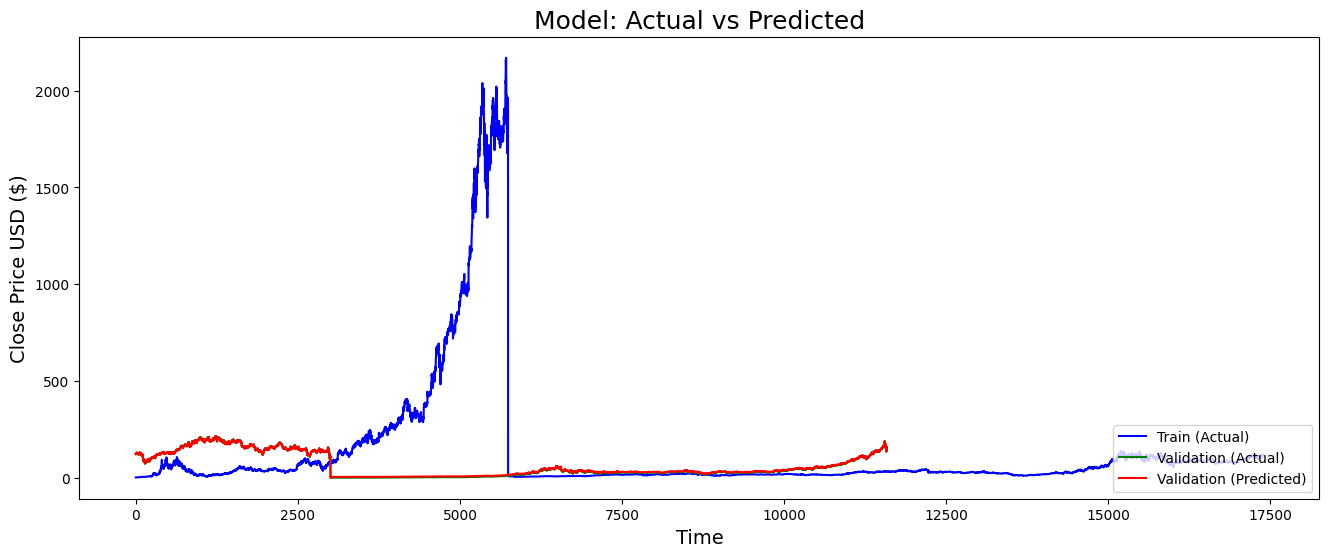

In [85]:
# Inverse transform the target values to their original scale
original_train_data = scaler.inverse_transform(train_data[time_step:])
original_test_data = scaler.inverse_transform(test_data[time_step:])

# Create a DataFrame for the training and validation data, and predictions
train = pd.DataFrame(data=original_train_data, columns=['Close'])
valid = pd.DataFrame(data=original_test_data, columns=['Close'])

# Trim the valid data to match the length of test_predict
valid = valid[:len(test_predict)]

# Now add predictions to the valid dataframe
valid['Predictions'] = test_predict

# Plotting the data
plt.figure(figsize=(16, 6))
plt.title('Model: Actual vs Predicted', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)

# Plot the training data
plt.plot(train['Close'], label='Train (Actual)', color='blue')

# Plot the actual validation data
plt.plot(valid['Close'], label='Validation (Actual)', color='green')

# Plot the predicted validation data
plt.plot(valid['Predictions'], label='Validation (Predicted)', color='red')

# Add a legend
plt.legend(['Train (Actual)', 'Validation (Actual)', 'Validation (Predicted)'], loc='lower right')

# Display the plot
plt.show()